In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\python\Liner_regretion_algo\dataset.csv")

In [3]:
df

,Obs,Price,SqFt,BedRooms,Baths,Garage,Zip
0,1,52900,932,1,1.0,0,4
1,2,61500,780,3,1.0,0,5
2,3,62000,1500,3,1.0,0,9
3,4,62900,760,2,1.0,0,4
4,5,64900,900,2,1.0,0,4
...,...,...,...,...,...,...,...
499,500,490000,3900,4,3.5,3,5
500,501,535000,3331,5,3.5,3,6
501,502,549000,3615,4,4.5,3,5
502,503,625000,4840,4,4.0,3,6


In [4]:
df.isnull().sum()

Obs         0
Price       0
SqFt        0
BedRooms    0
Baths       0
Garage      0
Zip         0
dtype: int64

In [10]:
import seaborn as sns

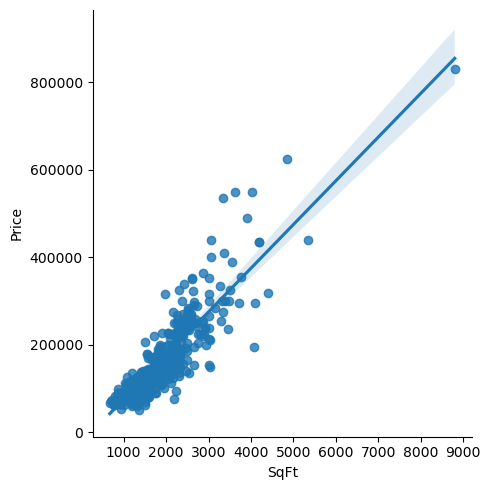

In [11]:
sns.lmplot(x='SqFt',y='Price',data=df)

<Axes: xlabel='BedRooms', ylabel='Price'>

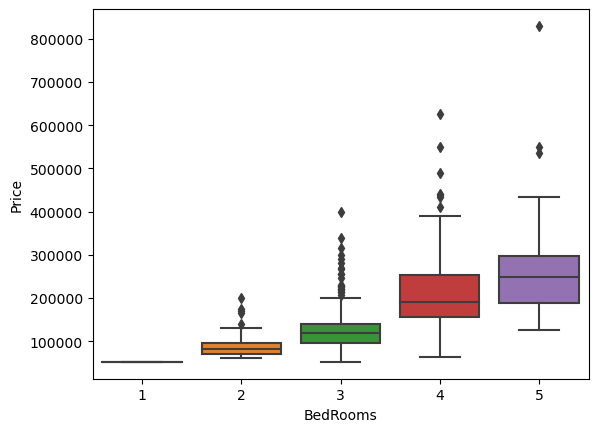

In [13]:
sns.boxplot(x='BedRooms',y='Price',data=df)

<Axes: xlabel='Baths', ylabel='Price'>

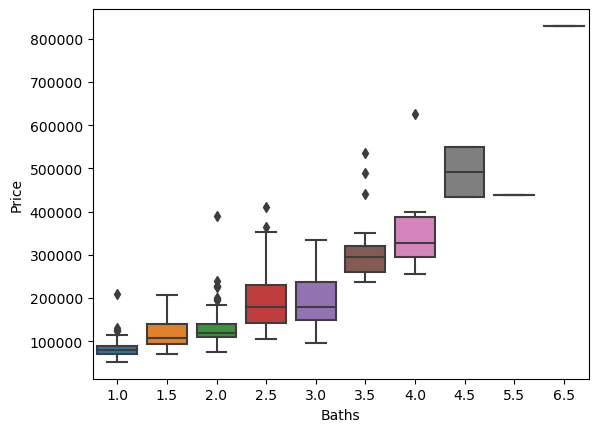

In [14]:

sns.boxplot(x='Baths',y='Price',data=df)

In [15]:
q3 = df['Price'].quantile(0.75)
q1 = df['Price'].quantile(0.25)

In [16]:
iqr = q3-q1

In [17]:
iqr

80000.0

In [18]:
ul = q3 +(1.5 * iqr)
ll = q3 -(1.5 * iqr)

In [19]:
print(ul,ll)

304900.0 64900.0


In [20]:
import numpy as np

In [21]:
upper = np.where(df['Price'] >= ul)

In [22]:
lower = np.where(df['Price'] <= ll)

In [23]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

In [24]:
x = df.iloc[:,2:5].values

In [25]:
y = df.iloc[:,1].values

In [26]:
print(x,y)

[[9.250e+02 3.000e+00 1.000e+00]
 [9.250e+02 3.000e+00 1.000e+00]
 [6.720e+02 2.000e+00 1.000e+00]
 ...
 [3.714e+03 4.000e+00 4.000e+00]
 [3.492e+03 4.000e+00 4.000e+00]
 [3.318e+03 4.000e+00 2.500e+00]] [ 65000  65000  67900  68900  69500  69900  69900  69900  71000  72500
  72900  73500  75000  76900  77000  77500  77900  78900  79000  79900
  79900  79900  79900  84900  87900  89000  89900  89900  89900  94900
  95000 129900 139000 139900 169900 172000 184900  69900  72000  72500
  72900  73500  73900  73900  78900  79900  79900  81500  82900  84500
  84900  84900  84900  84900  86000  86000  87500  87900  88000  88500
  89900  89900  89900  89900  89900  91600  92800  92900  93500  94500
  94900  94900  94900  95000  95000  96500  99500 100900 101500 104000
 104900 105000 109900 112500 113000 114900 119900 122900 129900 134900
 144900 150000 159500 159900  65000  72900  72900  72900  75000  76500
  76900  79900  79900  79900  81900  84500  84900  84900  89600  87000
  87500  88000 

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = reg.predict(x_test)

In [36]:
y_pred

array([132965.02338466, 173568.30642556, 110841.42247734, 162587.29196153,
       253134.06730964, 114596.45175202, 134987.11750281, 132269.66496736,
       153964.84758704, 115163.84790184, 330162.92817967, 151461.55728477,
       234748.64391048, 105353.73950996, 178655.62610909, 233241.16804567,
       111269.84076498, 112307.32368293, 108905.62214616, 120523.7562443 ,
       114677.09700973, 118223.42493795, 158490.23200746, 147289.40678098,
       260557.64442947, 144855.65232044, 132825.9517012 , 123716.7564346 ,
        85958.88819662,  78994.10078639, 129766.37466509, 155430.65497136,
       110707.99932315, 160008.81728826,  69884.90551979, 142775.13177654,
        71206.08651266, 134569.90245243, 191589.29267082, 186154.29377864,
       190465.51596589, 135120.63447828, 109392.37303827, 122673.71880865,
       126011.43921168, 185598.00704481, 171059.4614153 , 117592.04765439,
       101448.52913583,  98272.28689078, 234979.56408891, 129210.08793125,
       148471.51609039, 2

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,y_pred)

0.7516402894779592

In [39]:
reg.score(x_test,y_test)

0.7516402894779592

In [40]:
print(reg.predict([[780,3,1]]))

[59802.20846898]


In [41]:
print(reg.predict([[1500,3,2],[2000,4,4]]))

[128653.80119741 197088.08505419]
